In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory
import os

base_dir = 'Imagens/'

# Diretórios para treino, validação e teste
train_dir = os.path.join(base_dir, 'train/train1/')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


In [6]:
IMG_SIZE = 32
BATCH_SIZE = 32

# Configuração do gerador de imagens sem data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    
)

validation_dataset = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    
)

test_dataset = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    
)

Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [7]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


num_classes = 10

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)

In [9]:
# Treinar Rede
#model.load_weights('Primeiro_treino.h5')
history = model.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=[early_stopping, reduce_lr])

Epoch 1/50


313/313 [==============================] - 8s 21ms/step - loss: 3.1427 - accuracy: 0.3482 - val_loss: 5.0835 - val_accuracy: 0.1382 - lr: 0.0010
Epoch 2/50
313/313 [==============================] - 6s 20ms/step - loss: 2.5576 - accuracy: 0.4520 - val_loss: 2.5139 - val_accuracy: 0.4507 - lr: 0.0010
Epoch 3/50
313/313 [==============================] - 6s 19ms/step - loss: 2.2575 - accuracy: 0.5102 - val_loss: 2.2980 - val_accuracy: 0.4719 - lr: 0.0010
Epoch 4/50
313/313 [==============================] - 6s 18ms/step - loss: 2.0337 - accuracy: 0.5572 - val_loss: 1.9539 - val_accuracy: 0.5709 - lr: 0.0010
Epoch 5/50
313/313 [==============================] - 7s 21ms/step - loss: 1.8790 - accuracy: 0.5807 - val_loss: 1.8758 - val_accuracy: 0.5774 - lr: 0.0010
Epoch 6/50
313/313 [==============================] - 7s 22ms/step - loss: 1.7735 - accuracy: 0.6040 - val_loss: 1.8800 - val_accuracy: 0.5626 - lr: 0.0010
Epoch 7/50
313/313 [==============================] - 7s 23ms/

In [10]:
#Saving the model
model.save('Primeiro_treino.h5')

c:\Users\Tex\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
from tensorflow import keras

model = keras.models.load_model('Primeiro_treino.h5')
# Validacao da Rede
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

313/313 [==============================] - 3s 8ms/step - loss: 1.2050 - accuracy: 0.7439
val_acc: 0.7439000010490417


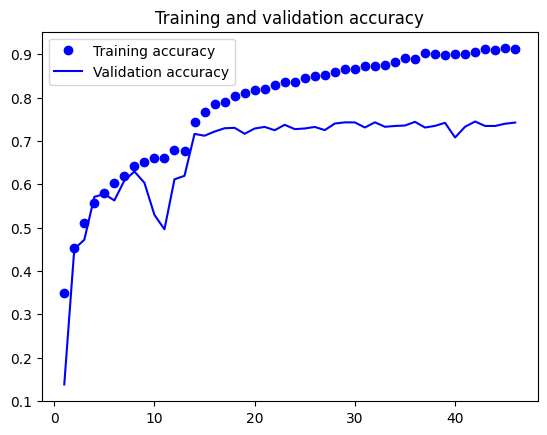

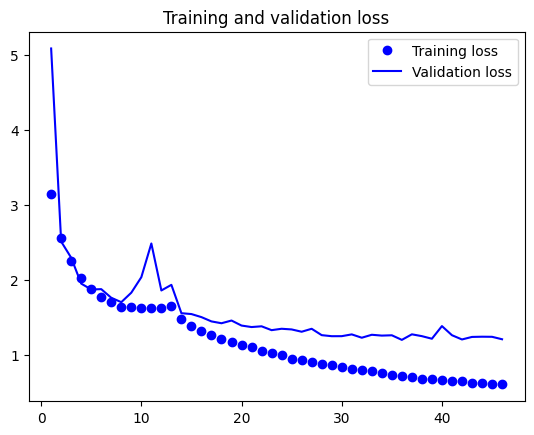

In [12]:
import matplotlib.pyplot as plt


# Extraindo os valores de acurácia e perda do histórico de treinamento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Definindo o número de épocas
epochs = range(1, len(acc) + 1)

# Plotando a acurácia de treinamento e validação
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Exibindo o gráfico de acurácia
plt.figure()

# Plotando a perda de treinamento e validação
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

# Exibindo o gráfico de perda
plt.show()
